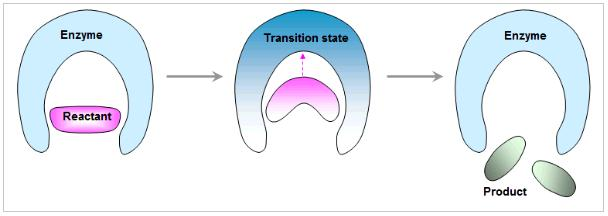

In [1]:
from IPython.display import Image
Image(filename='Lock-and-key.JPG')

In [2]:
from pysb import * # Model, Monomer, Parameter, Initial, Rule, Observable
from pysb.macros import *

In [3]:
Model()

<Model '_interactive_' (monomers: 0, rules: 0, parameters: 0, expressions: 0, compartments: 0) at 0x7fc01cd68700>

In [4]:
Monomer('enzyme', ['binding1'])

Monomer('enzyme', ['binding1'])

In [5]:
Monomer('protein', ['binding', 'state'], {'state': ['sub','pro']})

Monomer('protein', ['binding', 'state'], {'state': ['sub', 'pro']})

In [6]:
Parameter('kf',0.003)
Parameter('kr',0.001)
Parameter('kc',0.002)

Parameter('kc', 0.002)

In [8]:
Rule('binding', enzyme(binding1=None) + protein(state='sub', binding=None)
     | enzyme(binding1=1) % protein(state='sub', binding=1), kf, kr)

Rule('binding', enzyme(binding1=None) + protein(binding=None, state='sub') | enzyme(binding1=1) % protein(binding=1, state='sub'), kf, kr)

In [9]:
Rule('dissociation', enzyme(binding1=1) % protein(state='sub', binding=1) 
     >> enzyme(binding1=None) + protein(state='pro', binding=None), kc)

Rule('dissociation', enzyme(binding1=1) % protein(binding=1, state='sub') >> enzyme(binding1=None) + protein(binding=None, state='pro'), kc)

In [10]:
Parameter('enzyme_0', 100)
Parameter('protein_0', 50)
Initial(enzyme(binding1=None), enzyme_0 )
Initial(protein(binding=None, state='sub') , protein_0)

Initial(protein(binding=None, state='sub'), protein_0)

In [11]:
Observable('e_total', enzyme())
Observable('e_free', enzyme(binding1=None))
Observable('substrate', protein(binding=None, state='sub'))
Observable('product', protein(binding=None, state='pro'))
Observable('complex', enzyme(binding1=1) % 
           protein(binding=1, state='sub'))

Observable('complex', enzyme(binding1=1) % protein(binding=1, state='sub'))

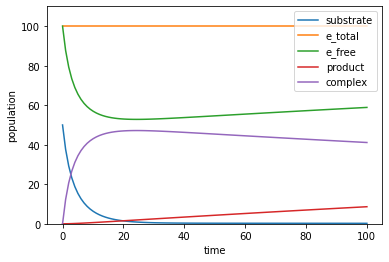

In [13]:
%matplotlib inline
from pysb.integrate import odesolve
import matplotlib.pyplot as plt
import numpy as np

tspan = np.linspace(0, 100, 100)
y = odesolve(model, tspan)

plt.plot(tspan, y['substrate'], label="substrate")
plt.plot(tspan, y['e_total'], label="e_total")
plt.plot(tspan, y['e_free'], label="e_free")
plt.plot(tspan, y['product'], label="product")
plt.plot(tspan, y['complex'], label="complex")
plt.xlabel('time')
plt.ylabel('population')
plt.ylim(0,110)
plt.legend(loc=0)
plt.show()